In [ ]:
# =============================================================================
# K-Means Clustering
# =============================================================================

# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Elbow Method
from sklearn.cluster import KMeans

In [ ]:
def elbow_method(epsilon, X, figure=False):
    wcss = [] # Pongo un vector a 0 para ver los distintos wcss segun el numero de clusters que defina

    diff = np.inf # Valor de diferencia entre dos iteraciones
    i_init = 2
    i = i_init
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))

        # Con init=k-means++ y con n_init defino que quiero usar la opcion de ++
        # (que tiene en cuenta la posicion inicial y su influencia)
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i,
                        init = 'k-means++',
                        max_iter = 300,
                        n_init = 10,
                        random_state = 0)
        kmeans.fit(X)

        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1

    if figure:
        plt.plot(range(i_init,len(wcss)+i_init), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Número de Clústers')
        plt.ylabel('WCSS')
        plt.show()

    # Clusters finales
    k = i-1
    return wcss, k

In [ ]:
# Dataset
dataset = pd.read_csv('CC GENERAL.csv', encoding='utf-8')
X = dataset[["BALANCE", "PURCHASES"]].values


Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16
Iteracion Nº Clusters: k: 17
Iteracion Nº Clusters: k: 18
Iteracion Nº Clusters: k: 19


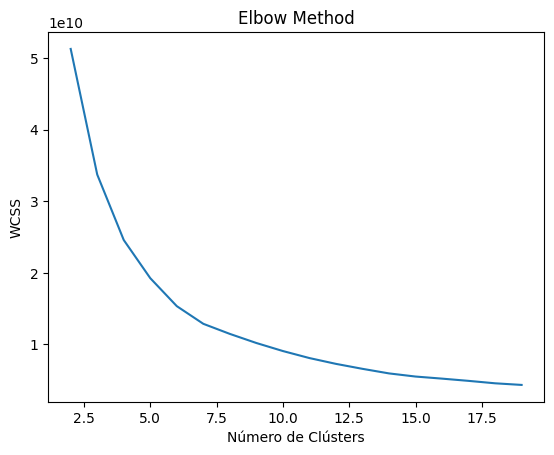

In [ ]:
# Visualizacion de los resultados
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, X, figure=True)

In [ ]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, X, figure=False)

Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4


In [ ]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

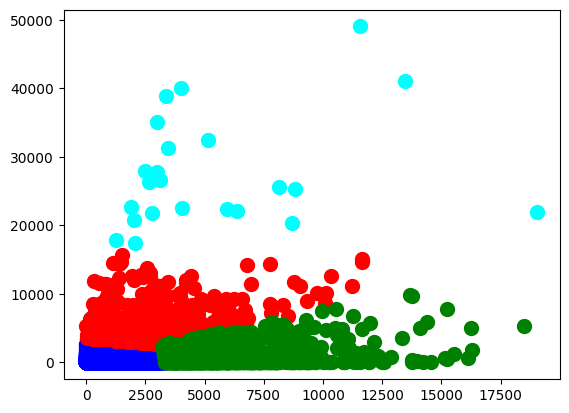

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'C4')

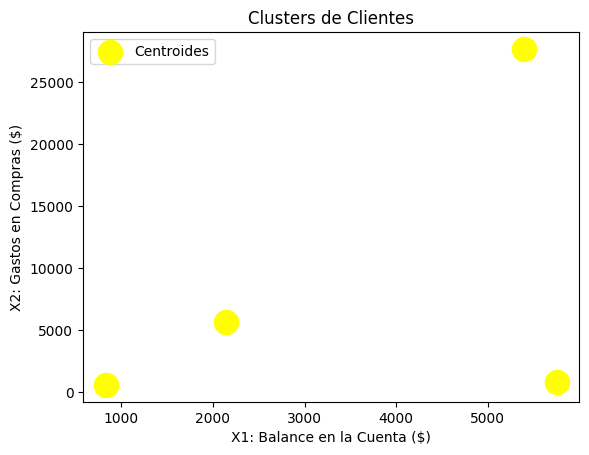

In [ ]:
# Para pintar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters de Clientes')
plt.xlabel('X1: Balance en la Cuenta ($)')
plt.ylabel('X2: Gastos en Compras ($)')
plt.legend()
plt.show()